# Метрические классификаторы

- вводная часть
- метрические алгоритмы
- KNN для задачи классификации
- KNN для задачи регрессии
- практические замечания по KNN
- кросс-валидация моделей
- оценка качества модели (accuracy, precision, recall, F1)

# Напоминание

- задача классификации
- линейный классификаторы
- метрический классификаторы
- логический классификаторы (TBD)

## Линейный классификатор
Один из линейных классификаторов (логистическая регрессия был рассмотрен на прошлой лекции), SVM будет рассмотрен в дальнейшем.

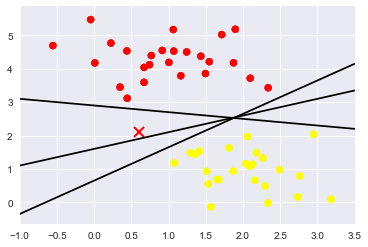

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

# Логические методы классификации
## Решающие деревья
Решающие деревья будут рассмотрены в следующих лекциях.
Сам по себе алгоритм не является достаточно сильным, но "комбинация" большого количества 
решающих деревьев показывает отличные результаты в задачах классификации и регрессии.

<img src="pics/decision_tree.jpg">

# Метрические алгоритмы классификации

## Гипотеза о компактности (не строгая)
Объекты одного класса находятся рядом.

<img src="pics/knn_for_children.jpg">

Automatically created module for IPython interactive environment


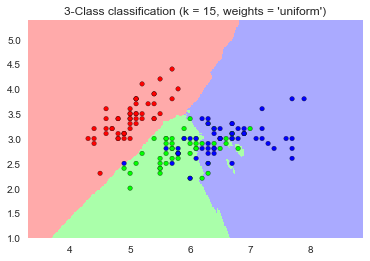

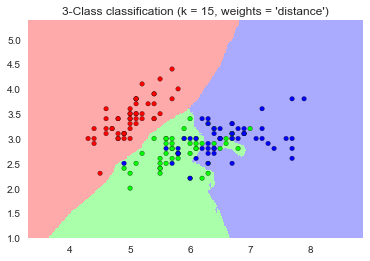

In [3]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

# Что такое метрика?

Пусть задано некоторое множество K. 
Тогда метрикой этого множества называется такая функция $d$, что для 
любых x и y из этого множества выполняются следующие свойства:
* $ d(x, y) = 0 <=> x = y $
* $ d(x, y) = d(y, x) $
* $d(x, z) \le d(x, y) + d(y, z)$

### Примеры метрик

https://en.wikipedia.org/wiki/Metric_(mathematics)#Examples

метрики зачастую порождаются нормами <br>
https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html

# KNN

In [4]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 8]

## KNN в задаче классификации

In [5]:
X, y = datasets.make_blobs(n_samples=100, random_state=4, centers=2, cluster_std=2)
X[:5], y[:5]

(array([[13.78731721,  1.73323541],
        [10.68075246,  3.87600675],
        [ 8.09139034,  0.36429043],
        [10.80129018,  6.34922981],
        [ 8.78819007,  2.53766878]]), array([0, 1, 1, 1, 0]))

In [6]:
def get_class_colour(class_label):
    return 'green' if class_label else 'blue'

In [7]:
def plot_points(X, y, new_points=None, new_prediction=None, nearest_points=None, file_name=None):
    plt.scatter(X[:, 0], X[:, 1], c=[get_class_colour(y_i) for y_i in y], s=100, edgecolor='black', alpha=0.3)
    
    if new_points is not None:
        plt.scatter(new_points[:, 0], new_points[:, 1], c='black', s=100, edgecolor='black')
    
    if new_prediction is not None:
        plt.scatter(new_points[:, 0], new_points[:, 1], c=[get_class_colour(y_i) for y_i in new_prediction], s=100, edgecolor='black')
        
    if nearest_points is not None:
        plt.scatter(nearest_points[:, 0], nearest_points[:, 1], c='red', s=100, edgecolor='black')
    
    plt.title("Classification problem \n What is the color for the new (x1, x2) pair?")
    plt.xlabel("x1 (feature)")
    plt.ylabel("x2 (feature)")
    plt.gca().set_aspect('equal', adjustable='box')
    
    if file_name:
        plt.savefig(filename)

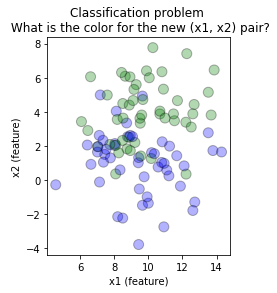

In [6]:
plot_points(X, y)

In [8]:
X_new = np.array([[12, 6]])

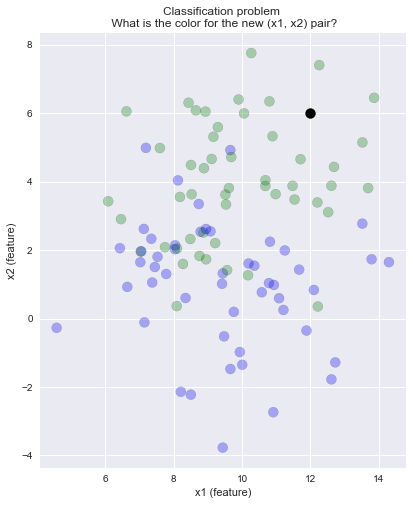

In [9]:
plot_points(X, y, new_points=X_new)

In [10]:
from scipy.spatial.distance import euclidean

def find_nearest_point_index(x_new, X):
    d_min = euclidean(x_new, X[0])
    min_idx = 0
    for idx in range(1, X.shape[0]):
        d = euclidean(x_new, X[idx])
        if d < d_min:
            d_min = d
            min_idx = idx
    return min_idx


min_idx = find_nearest_point_index(X_new, X)

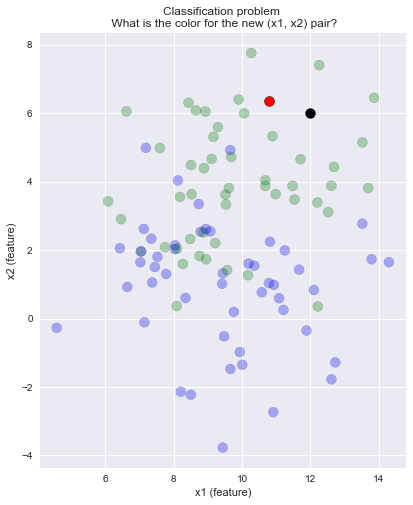

In [11]:
plot_points(X, y, new_points=X_new, nearest_points=X[[min_idx]])

In [13]:
def predict_class(x_new, X, y):
    min_idx = find_nearest_point_index(x_new, X)
    return y[min_idx]

y_new = predict_class(X_new, X, y)

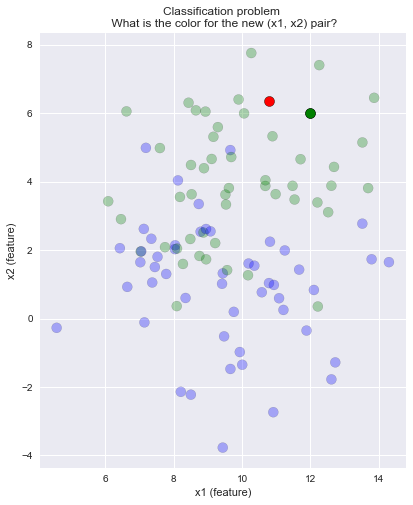

In [14]:
plot_points(X, y, new_points=X_new, new_prediction=[y_new], nearest_points=X[[min_idx]])

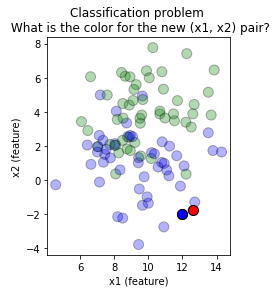

In [16]:
X_new = np.array([[12, -2]])
min_idx = find_nearest_point_index(X_new, X)
y_new = predict_class(X_new, X, y)


plot_points(X, y, new_points=X_new, new_prediction=[y_new], nearest_points=X[[min_idx]])

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X_new)

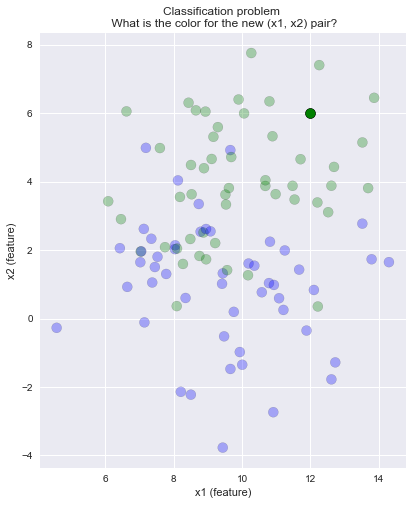

In [16]:
plot_points(X, y, new_points=X_new, new_prediction=[y_pred])

In [17]:
# np.c_ конкатенация массивов по второй оси https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html

X_new = np.c_[np.random.randint(5, 15, 10), np.random.randint(-2, 8, 10)]
print(X_new)

[[ 8  7]
 [ 9  1]
 [14  3]
 [14 -1]
 [13  6]
 [10  4]
 [ 5  7]
 [ 9  6]
 [ 9  6]
 [11 -2]]


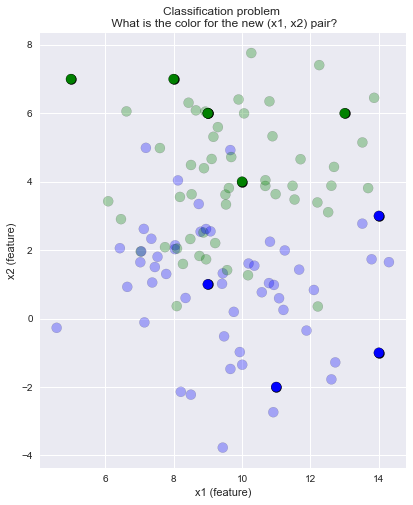

In [18]:
plot_points(X, y, new_points=X_new, new_prediction=knn.predict(X_new))

In [20]:
from scipy.spatial.distance import cdist
from collections import Counter

def predict_class(x_new, X, y, k=1):
    dist = cdist(x_new, X)
    nearest_y = y[np.argpartition(dist, k, axis=1)[:, :k]]
    return np.array([Counter(row).most_common(1)[0][0] for row in nearest_y])

### Разберем по этапам

In [25]:
# cdist рассчитывает расстояние между https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html
dist = cdist(X_new, X)
print(dist)

[[ 7.82507826  4.11652372  6.63633888  2.87588743  4.53140635  5.1864707
  10.86688123  8.58766917  6.94883471  5.13107858  7.16279699  4.05116618
   6.58234754  6.66983069  1.12190256  4.85841478  5.81898605  2.39401482
   1.90924802  2.9641107   7.66328104  5.44107245  9.14364443  9.53431665
   6.14869436  4.27577023  3.44990064  5.85727512  8.63439973  8.21016079
   4.98969591  5.8205399   3.97225756  4.97059877  5.52090399  3.69990539
   8.31379831  3.57136467  4.38774961  5.12379015  2.04958265  5.70066077
   3.99276366  7.47214744  5.34529711  6.7435313   6.40779323  5.97928475
   0.81815414  2.56208448  4.94488465  7.02798806  4.67205688  8.03446632
   5.52585539  5.5666448   4.9549162   4.3738101   8.26081894  5.97085725
   5.88641745  5.22476142  1.98970236  4.91929922  7.87124937  1.67090224
   4.56950712  4.48347438  5.21605581  9.23826742  2.29070415  5.53766152
   3.33829861  7.40366826  4.5801381   7.10875651  2.65590558  6.22322928
   2.83334502  1.33031927  2.75167535  

In [22]:
# находит отсортированные индексы https://docs.scipy.org/doc/numpy/reference/generated/numpy.argpartition.html
np.argpartition(dist, 1, axis=1)

array([[48, 14,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  1, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
         0, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
        64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
        80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95,
        96, 97, 98, 99],
       [24, 27,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23,  0, 25, 26,  1, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
        48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
        64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
        80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95,
        96, 97, 98, 99],
       [ 8, 91,  2,  3,  4,  5,  6,  7,  0,  9, 10, 11, 12, 13, 14, 15,
        16, 17

In [26]:
y_pred = predict_class(X_new, X, y, k=3)

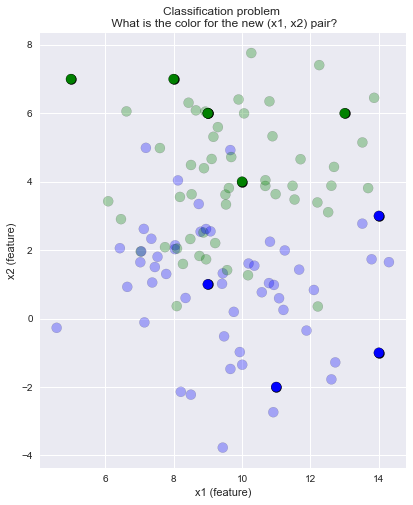

In [27]:
plot_points(X, y, new_points=X_new, new_prediction=y_pred)

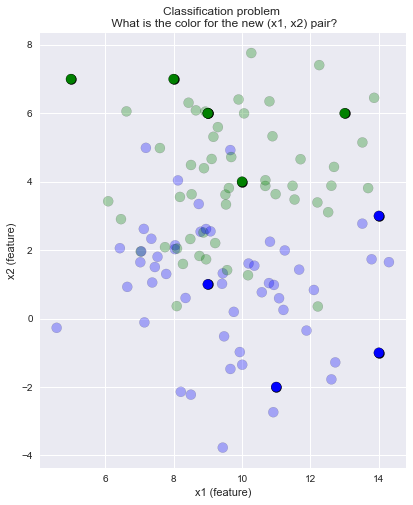

In [28]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
y_pred = knn.predict(X_new)
plot_points(X, y, new_points=X_new, new_prediction=y_pred)

### Рисуем области около точек

In [31]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
x_pred = np.c_[xx.ravel(), yy.ravel()]

In [33]:
xx.ravel()

array([ 4.08104623,  4.10104623,  4.12104623, ..., 14.74104623,
       14.76104623, 14.78104623])

In [34]:
def plot_knn_classifier(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    Z = knn.predict(x_pred)
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(12, 8))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

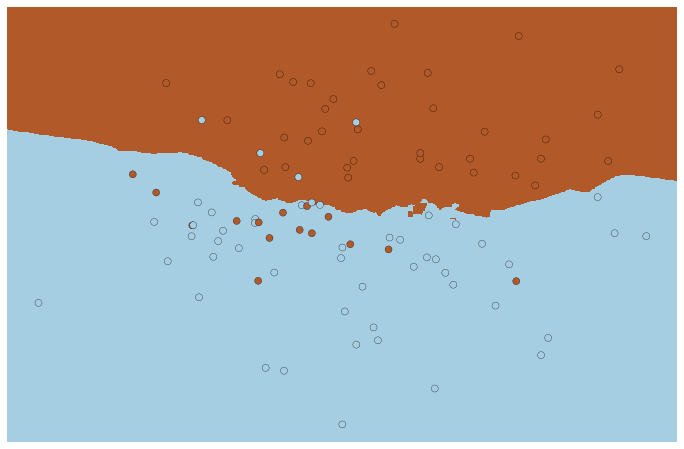

In [36]:
plot_knn_classifier(30) # 1, 30, 90

### Нормализация в KNN

In [37]:
X, y = datasets.make_blobs(n_samples=100, random_state=4, centers=2, cluster_std=2)
X[:, 1] *= 1000000000
X[:5], y[:5]

(array([[1.37873172e+01, 1.73323541e+09],
        [1.06807525e+01, 3.87600675e+09],
        [8.09139034e+00, 3.64290431e+08],
        [1.08012902e+01, 6.34922981e+09],
        [8.78819007e+00, 2.53766878e+09]]), array([0, 1, 1, 1, 0]))

In [38]:
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
accuracy_score(y_pred, y)

0.81

In [39]:
from sklearn.preprocessing import MinMaxScaler
knn = KNeighborsClassifier(n_neighbors=5)
X_scaled = MinMaxScaler().fit_transform(X)
knn.fit(X_scaled, y)
y_pred = knn.predict(X_scaled)
accuracy_score(y_pred, y)

0.87

### Другой пример 

<img src="pics/knn_cls.png">
<img src="pics/knn_cls_1.png">

## KNN в задаче регрессии

In [40]:
X = 10 * np.random.rand(100, 1).reshape(-1, 1)
y = X + np.random.randn(100, 1)

In [41]:
def plot_points_regression(X, y, new_points=None, new_prediction=None, nearest_points=None, file_name=None):
    plt.scatter(X[:, 0], y, c='blue', s=100, edgecolor='black', alpha=0.3)
    
    if new_points is not None:
        plt.scatter(new_points, new_prediction, c='green', s=100, edgecolor='black')
    
    plt.title("Regression problem \n What is the y value for the new x?")
    plt.xlabel("x1 (feature)")
    plt.ylabel("x2 (feature)")
    plt.gca().set_aspect('equal', adjustable='box')
    
    if file_name:
        plt.savefig(filename)

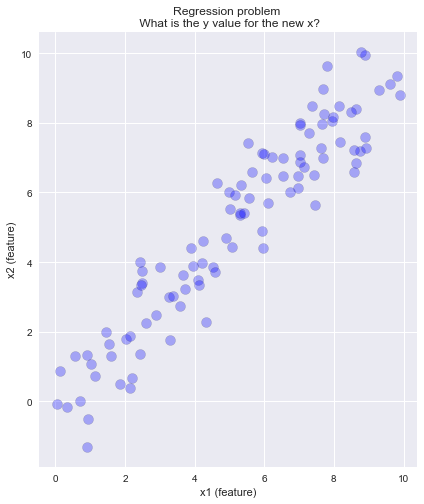

In [42]:
plot_points_regression(X, y)

In [43]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X, y)
x_new = 10 * np.random.rand(10, 1).reshape(-1, 1)
y_pred = knn.predict(x_new)

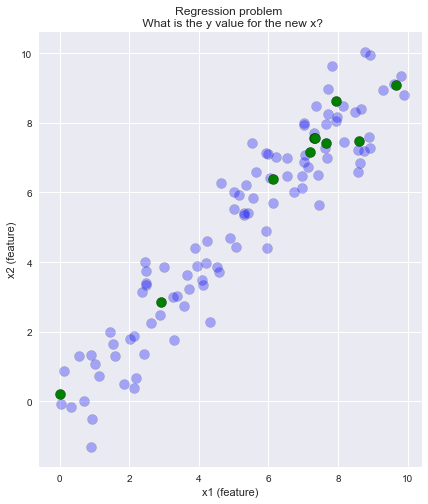

In [44]:
plot_points_regression(X, y, new_points=x_new, new_prediction=y_pred)

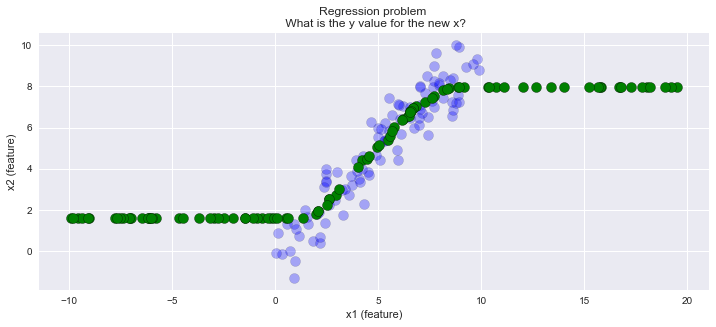

In [45]:
x_new = (30 * np.random.rand(100, 1) - 10).reshape(-1, 1)

knn = KNeighborsRegressor(n_neighbors=30) # 1, 10, 30, 100
knn.fit(X, y)
y_pred = knn.predict(x_new)
plot_points_regression(X, y, new_points=x_new, new_prediction=y_pred)

### Упражнение: 
Как можно улучшить KNN. Подумайте, в каких случая KNN работает не так хорошо, как должен, с помощью чего можно это исправить.

- метод парзеновского окна постоянной ширины
- метод парзеновского окна переменной ширины
- метод потенциальных функций

http://www.machinelearning.ru/wiki/index.php?title=Метод_ближайших_соседей

## KNN практические замечания

- перед запуском проверьте гипотезу о компактности (визуализации, подсчет статистик и т.д.) https://www.kaggle.com/skalskip/iris-data-visualization-and-knn-classification
- быстрое обучение и предсказание
- малое число параметров
- используйте в качестве baseline
- knn в качестве исходника мета-признаков
- поиск ближайшего элемента используется как алгоритм во многих системах 
  * поисковые системы
  * рекомендация
- используйте в качестве алгоритма для отсева шумов
- помните про проклятие размерности http://www.machinelearning.ru/wiki/index.php?title=Проклятие_размерности
- используйте приближенные алгоритмы для поиска ближайших соседей
- хорошо интерпретируется и визуализируются (можно посмотреть на ближайшие объекты)

## Параметры модели

Эти параметры может быть полезно подбирать при выборе модели

weights: 
- "uniform" (все веса равны), 
- "distance" (вес обратно пропорционален расстоянию до тестового примера)
- определенная пользователем функция

algorithm: 
- "brute" 
- "ball_tree"
- "KD_tree"
- "auto". 

leaf_size: порог переключения на полный перебор в случае выбора BallTree или KDTree для нахождения соседей
metric: 
- "minkowski"
- "manhattan"
- "euclidean"
- "chebyshev"

### Упражнение:
какая метрика будет лучше всего работать в задаче текстовой классификации?

</br>



### Оцените по шкале 0-10 насколько понятен материал до текущего момента



<br>

## Выбор параметров модели

<img src="pics/vtt.png">

Testing set - в самом начале работы сохранить часть данных и не использовать их до внедрения модели в боевое окружение. Дальше работаем с разбиением на 2 части, которые вместо train и validation называем train и test.

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((60, 1), (40, 1), (60, 1), (40, 1))

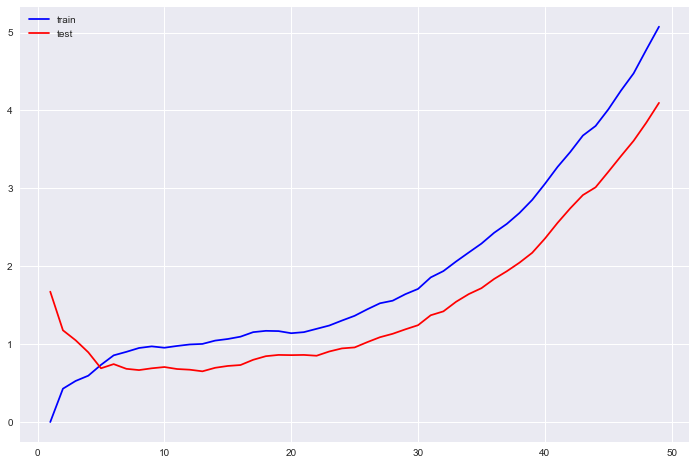

In [48]:
from sklearn.metrics import mean_squared_error
neighbors = range(1, 50)
errors_train = []
errors_test = []
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    errors_train.append(mean_squared_error(knn.predict(X_train), y_train))
    errors_test.append(mean_squared_error(knn.predict(X_test), y_test))
    
plt.plot(neighbors, errors_train, color='blue', label='train')
plt.plot(neighbors, errors_test, color='red', label='test')
plt.legend()

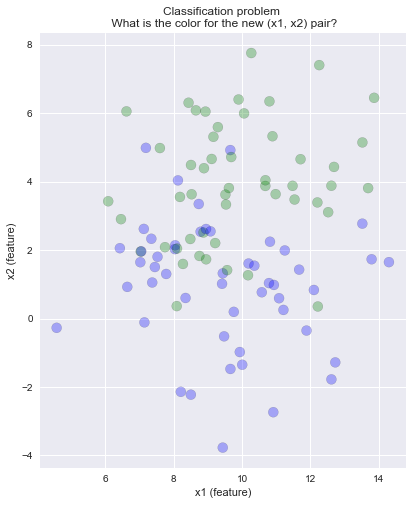

In [49]:
X, y = datasets.make_blobs(n_samples=100, random_state=4, centers=2, cluster_std=2)
X[:5], y[:5]
plot_points(X, y)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((60, 2), (40, 2), (60,), (40,))

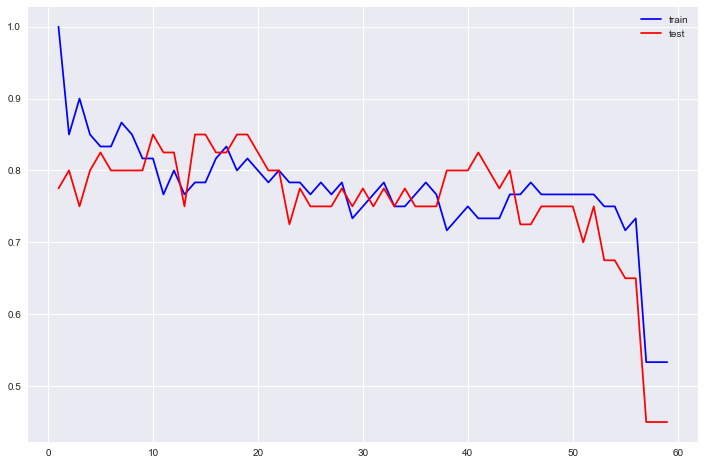

In [51]:
neighbors = range(1, 60)
errors_train = []
errors_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    errors_train.append(accuracy_score(knn.predict(X_train), y_train))
    errors_test.append(accuracy_score(knn.predict(X_test), y_test))
    
plt.plot(neighbors, errors_train, color='blue', label='train')
plt.plot(neighbors, errors_test, color='red', label='test')
plt.legend()

((180, 2), (120, 2), (180,), (120,))

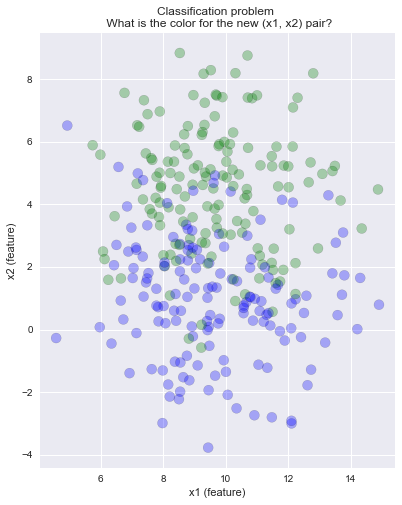

In [52]:
X, y = datasets.make_blobs(n_samples=300, random_state=4, centers=2, cluster_std=2)
X[:5], y[:5]
plot_points(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 



### Методы поиска ближайших соседей

- KD деревья https://ru.wikipedia.org/wiki/K-мерное_дерево
- ball деревья https://en.wikipedia.org/wiki/Ball_tree
- Locality sensitive hashing http://www.mmds.org/mmds/v2.1/ch03-lsh.pdf


Если на практике встала задача поиска ближайших соседей, рекомендую использовать https://github.com/spotify/annoy

# Sklearn Pipeline

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

Pipeline принимает на вход список "преобразователей" (отбор признаков, их нормировка и т.п.) и классификатор в качестве последнего параметра.

In [53]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

# X_train and X_test are lists of strings, each 
# representing one document
# y_train and y_test are vectors of labels
X_train = ["This is 1", "This is 2", "this is not 1", "this is not 2"]
X_test = ["This is 1 test", "This is 2 test", "this is not 1 test", "this is not 2 test"]
y_train = [[1], [1], [0], [0]]
y_test = [[1], [1], [0], [0]]

# this calculates a vector of term frequencies for 
# each document
vect = CountVectorizer()

# this normalizes each term frequency by the 
# number of documents having that term
tfidf = TfidfTransformer()

# this is a linear SVM classifier
clf = LinearSVC()

pipeline = Pipeline([
    ('vect',vect),
    ('tfidf',tfidf),
    ('clf',clf)
])

# call fit as you would on any classifier
pipeline.fit(X_train,y_train)

# predict test instances
y_preds = pipeline.predict(X_test)

# calculate f1
mean_f1 = f1_score(y_test, y_preds, average='micro')

print(mean_f1)

1.0


C:\javasdk\anakonda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Кросс-валидация

 ### Упражнение 
 Одного измерения качества работы алгоритма мало, что можно с этим сделать?

In [54]:
m = 100
np.random.seed(8)
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
X_new = np.linspace(-3, 3, 100).reshape(100, 1)

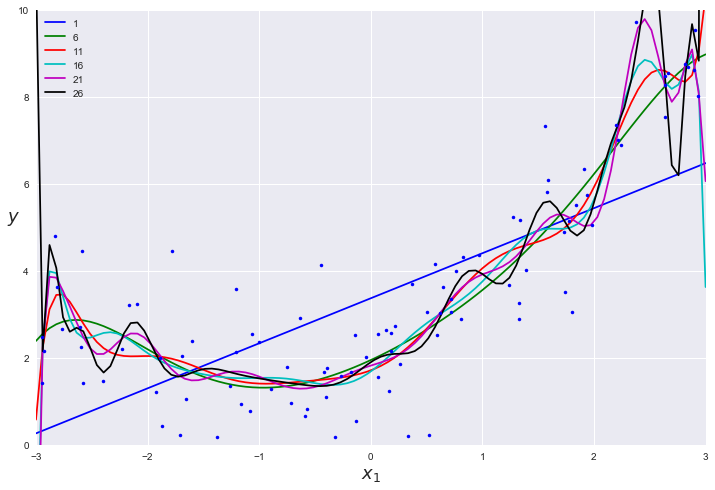

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from itertools import cycle
cycol = iter(cycle('bgrcmk'))

for degree in range(1, 30, 5):
    style = next(cycol)
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree))

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
# plt.savefig('pics/regression_poly_overfit.pdf')
plt.show()

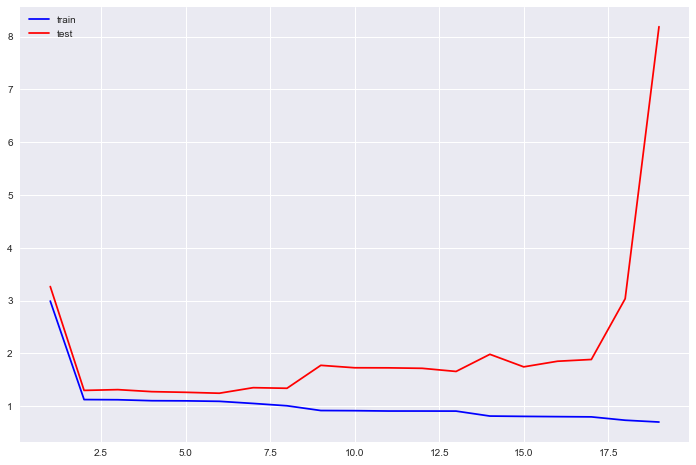

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


errors_train = []
errors_test = []
degree = range(1, 20, 1)
for d in degree:
    polybig_features = PolynomialFeatures(degree=d, include_bias=False)
    std_scaler = StandardScaler()
    lr = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lr", lr),
        ])
    polynomial_regression.fit(X_train, y_train)
    errors_train.append(mean_squared_error(polynomial_regression.predict(X_train), y_train))
    errors_test.append(mean_squared_error(polynomial_regression.predict(X_test), y_test))
    
plt.plot(degree, errors_train, color='blue', label='train')
plt.plot(degree, errors_test, color='red', label='test')
plt.legend()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
from sklearn.pipeline import make_pipeline
reg = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(), 
    LinearRegression()
)
reg.fit(X_train, y_train)
mean_squared_error(reg.predict(X_test), y_test)

1.2963258341408133

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2)
reg = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(), 
    LinearRegression()
)
reg.fit(X_train, y_train)
mean_squared_error(reg.predict(X_test), y_test)

0.8383217821179303

## Кросс валидация

## K-Fold

<img src='pics/cv.png'>

In [59]:
from sklearn.model_selection import cross_val_score
reg = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(), 
    LinearRegression()
)
scores = cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error')
print(scores)
print('mean', scores.mean())
print('std', scores.std())

[-1.2517077  -1.51190413 -0.99480168 -1.14270688 -1.32488083]
mean -1.245200244227485
std 0.1736240969601712


In [61]:
from sklearn.linear_model import Ridge
reg = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(), 
    Ridge()
)
scores = cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error')
print(scores)
print('mean', scores.mean())
print('std', scores.std())

[-1.25455576 -1.52809085 -0.98394065 -1.14936014 -1.31776963]
mean -1.2467434058735107
std 0.18044995221811505


### Leave One Out

In [101]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import LeaveOneOut

reg = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(), 
    Ridge()
)

cv = LeaveOneOut()
scores = cross_val_score(reg, X, y, cv=cv, scoring='neg_mean_squared_error')
print(scores)
print('mean', scores.mean())
print('std', scores.std())

[-1.72903885e-02 -5.15005019e-06 -1.02208322e-01 -1.22486617e-01
 -6.53986084e-01 -1.11717320e+00 -2.81707380e-05 -8.77149905e-01
 -2.26083579e-01 -1.90156854e+00 -5.15367535e+00 -2.29731961e-01
 -6.49891545e+00 -1.26202903e+00 -1.72771023e-03 -6.40015777e+00
 -2.16997661e-02 -3.90844791e-02 -8.08562385e-01 -1.62016661e-01
 -1.51480868e-02 -2.52732673e-01 -6.61940289e-03 -1.22468213e+00
 -1.40829736e+00 -3.56737781e-01 -1.88482058e+00 -6.85056438e+00
 -3.42126664e+00 -2.00896486e-01 -3.97530717e+00 -4.19160386e-02
 -3.34362495e-01 -1.49430389e+00 -3.53778609e-01 -4.89660268e-01
 -3.48329987e-01 -1.83747245e+00 -6.18476773e+00 -1.27472928e+00
 -3.91878836e+00 -3.42261018e-02 -6.03639358e-02 -5.90691705e-01
 -3.96877814e-02 -3.33739648e+00 -1.72043293e+00 -1.53360761e-01
 -3.70026410e-02 -2.55733297e+00 -1.86675527e+00 -8.48618042e-01
 -2.15566137e+00 -1.69880508e+00 -2.12399345e-01 -7.65671932e-01
 -1.36833624e-01 -2.54875706e-02 -1.41687221e-01 -7.46139875e-02
 -1.99044246e+00 -8.04224

Математические выкладки http://www.machinelearning.ru/wiki/index.php?title=Скользящий_контроль

## GridSearch

In [81]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'ridge__alpha': [1e-8, 1e-7, 1e-6, 1e-5, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
]

reg = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(), 
    Ridge()
)

grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'ridge__alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [93]:
grid_search.best_params_

{'ridge__alpha': 1e-08}

In [94]:
grid_search.best_estimator_

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1e-08, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [95]:
grid_search.best_score_

-1.2452002442350536

In [96]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'ridge__alpha': [1e-8, 1e-7, 1e-6, 1e-5, 0.0001, 0.001, 0.01, 0.1, 1, 10],
        'polynomialfeatures__degree': [1, 2, 3, 4, 5]
    },
]

reg = make_pipeline(
    PolynomialFeatures(include_bias=False),
    StandardScaler(), 
    Ridge()
)

grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'ridge__alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10], 'polynomialfeatures__degree': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [98]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'polynomialfeatures__degree': 2, 'ridge__alpha': 1e-08}
-1.2452002442350536


In [99]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
        'ridge__alpha': [1e-8, 1e-7, 1e-6, 1e-5, 0.0001, 0.001, 0.01, 0.1, 1, 10],
        'polynomialfeatures__degree': [1, 2, 3, 4, 5]
    }

reg = make_pipeline(
    PolynomialFeatures(include_bias=False),
    StandardScaler(), 
    Ridge()
)

rand_search = RandomizedSearchCV(reg, param_grid, cv=5, scoring='neg_mean_squared_error')
rand_search.fit(X, y)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'ridge__alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10], 'polynomialfeatures__degree': [1, 2, 3, 4, 5]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [116]:
print(rand_search.best_estimator_)
print(rand_search.best_score_)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1e-08, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])
-1.2452002442350536


## Оценка качества работы алгоритма

$T_p$ -- true positives<br>
$F_p$ -- false positives<br>
$T_n$ -- true negatives<br>
$F_n$ -- false negatives


$$ Accuracy = \frac{T_p}{Total} $$


$$ Precision = \frac{T_p}{T_p + F_p} $$


$$ Recall = \frac{T_p}{T_p +F_n} $$


$$ F_1 = 2 * \frac{P*R}{P + R} $$

<img src='pics/Precisionrecall.svg.png'>

### Упражнение
accuracy очевидный способ оценки качества классификатора. Для чего нужны precision и recall?
Придумайте пример, когда accuracy недостаточно.

### Дополнительные материалы:
- http://www.machinelearning.ru/wiki/index.php?title=Метод_ближайших_соседей
- http://scikit-learn.org/stable/modules/neighbors.html
- http://bigdata-madesimple.com/k-nearest-neighbors-curse-dimensionality-python-scikit-learn/
- https://www.kaggle.com/skalskip/iris-data-visualization-and-knn-classification